<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/TTF_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("DATA.csv")
data.head()

,data,TTF,HH
0,2021/9/6,18.15,4.71
1,2021/9/7,18.61,4.57
2,2021/9/8,18.97,4.91
3,2021/9/9,19.54,5.03
4,2021/9/10,20.10,4.94


In [3]:
price=data.loc[:,'TTF']
price.head(10)

0    18.15
1    18.61
2    18.97
3    19.54
4    20.10
5    21.30
6    22.78
7    22.70
8    21.00
9    22.56
Name: TTF, dtype: float64

In [4]:
price_norm=price/max(price)
price_norm

0      0.188219
1      0.192990
2      0.196723
3      0.202634
4      0.208441
         ...   
377    0.141346
378    0.143420
379    0.137716
380    0.135124
381    0.162086
Name: TTF, Length: 382, dtype: float64

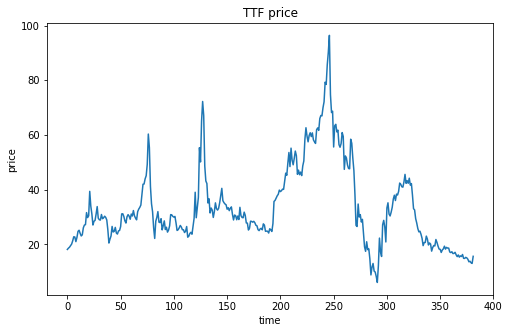

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1=plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('TTF price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [6]:
len(data)

382

In [7]:
time_step=6

In [8]:
def extract_data(data,time_step):
  X=[]
  y=[]
  for i in range(len(data)-time_step):
    X.append([a for a in data[i:i+time_step]])
    y.append(data[i+time_step])
  X=np.array(X)
  X=X.reshape(X.shape[0],X.shape[1],1)
  return X,y

In [9]:
X,y=extract_data(price_norm,time_step)

In [10]:
X[0,:,:]

array([[0.18821943],
       [0.19298973],
       [0.19672301],
       [0.20263404],
       [0.20844136],
       [0.22088562]])

In [11]:
y

[0.23623353728092916,
 0.23540391994192678,
 0.21777455148812608,
 0.23395208959867259,
 0.2567665664212382,
 0.26101835528362544,
 0.24919630820284144,
 0.23934460230218807,
 0.2435963911645753,
 0.27024784818002695,
 0.2807217670849321,
 0.28217359742818626,
 0.3279062532406927,
 0.30892875661101316,
 0.31587680182515815,
 0.40848283729129936,
 0.35248366690863836,
 0.3228248470393031,
 0.28082546925230734,
 0.2951363683500985,
 0.2983511355387327,
 0.3227211448719278,
 0.3507207300632583,
 0.30685471326350716,
 0.30083998755573993,
 0.2995955615472363,
 0.32064710152442183,
 0.3047806699160012,
 0.30820284143938603,
 0.3142175671471534,
 0.30975837395001554,
 0.2998029658819869,
 0.2628849942963808,
 0.2123820387846106,
 0.22731515088665352,
 0.2394483044695634,
 0.27543295654879185,
 0.25438141657160634,
 0.2567665664212382,
 0.2718033806906564,
 0.25033703204396973,
 0.24650005185108367,
 0.2585295032666183,
 0.2599813336098724,
 0.27481074354454005,
 0.3229285492066784,
 0.323550

In [12]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN 

In [13]:
model=Sequential()
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation="relu"))
model.add(Dense(units=1,activation="linear"))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(np.array(X),np.array(y),batch_size=30,epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 4ms/step - loss: 0.1174
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1057
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0945
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0842
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0572
Epoch 8/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0493
Epoch 9/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0393
Epoch 10/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0287
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0211
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0186
Epoch 13/200
13/13 [================

In [15]:
y_train_predict=model.predict(X)*max(price)
y_train=[i*max(price) for i in y]
print(y_train_predict,y_train)

12/12 [==============================] - 0s 2ms/step
[[22.041737 ]
 [23.518381 ]
 [23.592829 ]
 [21.983383 ]
 [23.417267 ]
 [25.184572 ]
 [25.084864 ]
 [24.287592 ]
 [24.111168 ]
 [24.517752 ]
 [26.452684 ]
 [27.195818 ]
 [27.379772 ]
 [32.359245 ]
 [30.932676 ]
 [30.917978 ]
 [40.39378  ]
 [35.22597  ]
 [30.604067 ]
 [31.929901 ]
 [30.58889  ]
 [29.33147  ]
 [30.896368 ]
 [34.237473 ]
 [30.55751  ]
 [30.014236 ]
 [31.15619  ]
 [31.66808  ]
 [29.83648  ]
 [30.3575   ]
 [31.696716 ]
 [30.831282 ]
 [29.741796 ]
 [26.669466 ]
 [21.835651 ]
 [23.065157 ]
 [23.539133 ]
 [25.520313 ]
 [24.477592 ]
 [25.252432 ]
 [27.599794 ]
 [24.90412  ]
 [24.0885   ]
 [25.996353 ]
 [25.562344 ]
 [26.590918 ]
 [31.492767 ]
 [31.735195 ]
 [30.700193 ]
 [30.438438 ]
 [29.533957 ]
 [31.086765 ]
 [31.497108 ]
 [30.650728 ]
 [30.332853 ]
 [32.471115 ]
 [31.521473 ]
 [32.848846 ]
 [31.730936 ]
 [30.592997 ]
 [30.526789 ]
 [32.951523 ]
 [33.531868 ]
 [33.937313 ]
 [35.54443  ]
 [39.509045 ]
 [42.846294 ]
 [42.3838

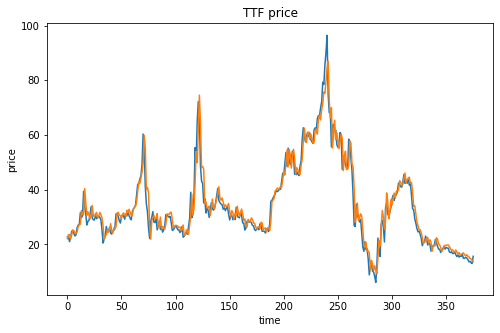

In [16]:
fig2=plt.figure(figsize=(8,5))
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('TTF price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()